In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [55]:
x1 = np.array([18 + 1 * np.random.randn() for i in range(1, 100)])
x2 = np.array([5 + 1 * np.random.randn() for i in range(1, 100)])
y1 = np.array([1 for i in range(1, 100)])
y2 = np.array([0 for i in range(1, 100)])
label = ["Dadang" for i in range(1, 100)]

df_1 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y1': y1,
    'y2': y2,
    'label': label
})

df_1

,x1,x2,y1,y2,label
0,18.468124,6.484602,1,0,Dadang
1,17.947951,5.235976,1,0,Dadang
2,19.770831,7.471691,1,0,Dadang
3,18.383831,5.079782,1,0,Dadang
4,17.753077,6.073219,1,0,Dadang
...,...,...,...,...,...
94,16.464976,7.388604,1,0,Dadang
95,16.959327,2.791741,1,0,Dadang
96,17.526043,5.659248,1,0,Dadang
97,18.016803,2.973048,1,0,Dadang


In [56]:
x1 = np.array([10 + 1 * np.random.randn() for i in range(1, 100)])
x2 = np.array([9 + 1 * np.random.randn() for i in range(1, 100)])
y1 = np.array([0 for i in range(1, 100)])
y2 = np.array([1 for i in range(1, 100)])
label = ["Bambang" for i in range(1, 100)]

df_2 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y1': y1,
    'y2': y2,
    'label': label
})

df_2

,x1,x2,y1,y2,label
0,10.485408,7.825316,0,1,Bambang
1,9.862173,8.147926,0,1,Bambang
2,10.549731,10.042665,0,1,Bambang
3,10.980173,7.520673,0,1,Bambang
4,9.039751,8.885897,0,1,Bambang
...,...,...,...,...,...
94,7.763934,9.657642,0,1,Bambang
95,9.324732,8.500088,0,1,Bambang
96,10.520092,11.162544,0,1,Bambang
97,9.890518,8.382489,0,1,Bambang


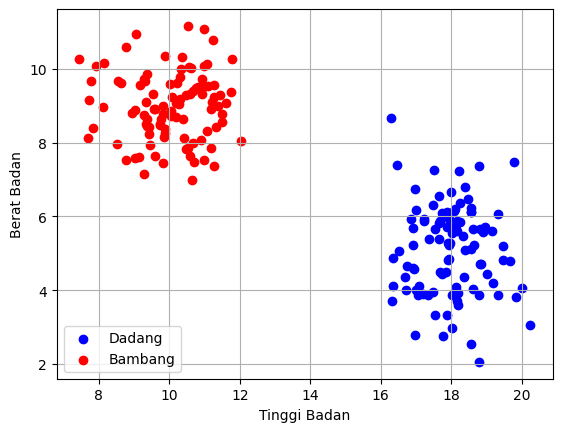

In [57]:
plt.scatter(df_1.x1, df_1.x2, label="Dadang", color="blue")
plt.scatter(df_2.x1, df_2.x2, label="Bambang", color="red")
plt.xlabel("Tinggi Badan")
plt.ylabel("Berat Badan")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [58]:
df = pd.concat([df_1, df_2])
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df

,x1,x2,y1,y2,label
0,18.808443,4.704160,1,0,Dadang
1,8.128546,8.957878,0,1,Bambang
2,10.485408,7.825316,0,1,Bambang
3,19.019236,4.436398,1,0,Dadang
4,9.887947,8.274928,0,1,Bambang
...,...,...,...,...,...
193,10.918336,9.314393,0,1,Bambang
194,11.244076,10.779157,0,1,Bambang
195,11.317057,8.418239,0,1,Bambang
196,10.061074,8.712600,0,1,Bambang


In [59]:
w11 = np.random.uniform(-0.01, 0.01)
w12 = np.random.uniform(-0.01, 0.01)
w21 = np.random.uniform(-0.01, 0.01)
w22 = np.random.uniform(-0.01, 0.01)
W = np.array([[w11, w12], [w21, w22]])
W

array([[ 0.00393954,  0.0029828 ],
       [-0.00655365, -0.00010857]])

In [60]:
learning_rate = 0.1
error_array = np.zeros((2,len(df)))
answer = []

for index, baris in df.iterrows():
    W_lama = W
    input = np.array([[baris.x1], [baris.x2]])
    output_pred = sigmoid(np.dot(W, input))
    output_actual = np.array([[baris.y1], [baris.y2]])

    error = (output_actual - output_pred) ** 2

    delta_W = np.dot(learning_rate * 2 * (output_actual - output_pred) * output_pred * (1 - output_pred), input.T)
    W_baru = W_lama + delta_W
    W = W_baru

    error_array[:,index] = error.T*error.T

    tebakan = np.argmax(output_pred)
    jawaban = np.argmax(output_actual)

    label = "Bambang" if tebakan == 1 else "Dadang"

    if tebakan == jawaban:
        answer.append(1)
    else:
        answer.append(0)

    print(f"Index: {index}, tebakan = {label}, jawaban = {baris.label}")

Index: 0, tebakan = Dadang, jawaban = Dadang
Index: 1, tebakan = Dadang, jawaban = Bambang
Index: 2, tebakan = Dadang, jawaban = Bambang
Index: 3, tebakan = Dadang, jawaban = Dadang
Index: 4, tebakan = Dadang, jawaban = Bambang
Index: 5, tebakan = Dadang, jawaban = Bambang
Index: 6, tebakan = Dadang, jawaban = Dadang
Index: 7, tebakan = Dadang, jawaban = Dadang
Index: 8, tebakan = Dadang, jawaban = Bambang
Index: 9, tebakan = Dadang, jawaban = Dadang
Index: 10, tebakan = Dadang, jawaban = Dadang
Index: 11, tebakan = Dadang, jawaban = Dadang
Index: 12, tebakan = Dadang, jawaban = Dadang
Index: 13, tebakan = Dadang, jawaban = Bambang
Index: 14, tebakan = Dadang, jawaban = Dadang
Index: 15, tebakan = Dadang, jawaban = Dadang
Index: 16, tebakan = Dadang, jawaban = Bambang
Index: 17, tebakan = Dadang, jawaban = Dadang
Index: 18, tebakan = Dadang, jawaban = Dadang
Index: 19, tebakan = Dadang, jawaban = Dadang
Index: 20, tebakan = Dadang, jawaban = Dadang
Index: 21, tebakan = Dadang, jawaban 

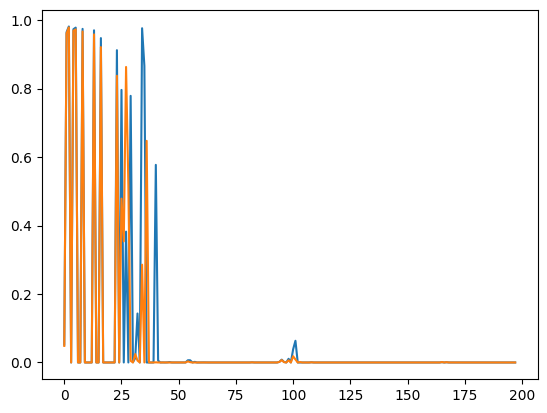

In [61]:
plt.plot(error_array.T)

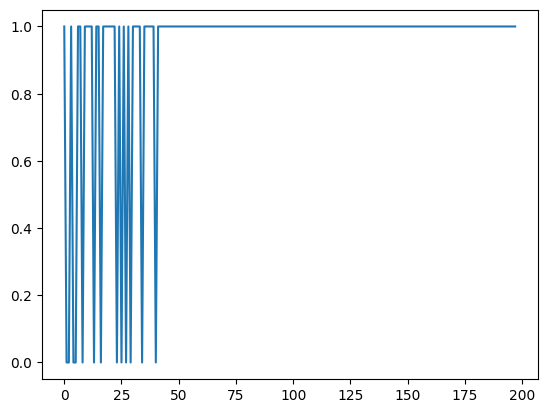

In [62]:
plt.plot(answer)

In [63]:
tinggi_badan = 19
berat_badan = 6.5
input = np.array([[tinggi_badan], [berat_badan]])
output_pred = sigmoid(np.dot(W, input))
pred = np.argmax(output_pred)

label = "Bambang" if pred == 1 else "Dadang"
print(f"Tinggi: {tinggi_badan * 10}, Berat: {berat_badan * 10} adalah {label}")

Tinggi: 190, Berat: 65.0 adalah Dadang


In [64]:
tinggi_badan = 12
berat_badan = 8
input = np.array([[tinggi_badan], [berat_badan]])
output_pred = sigmoid(np.dot(W, input))
pred = np.argmax(output_pred)

label = "Bambang" if pred == 1 else "Dadang"
print(f"Tinggi: {tinggi_badan * 10}, Berat: {berat_badan * 10} adalah {label}")

Tinggi: 120, Berat: 80 adalah Bambang
